In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
cancer_df=pd.read_csv('BreastCancer.csv',index_col=0)

In [3]:
cancer_df

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,Malignant
1371026,5,10,10,10,4,10,5,6,3,Malignant
1371920,5,1,1,1,2,1,3,2,1,Benign


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lbl=LabelEncoder()

In [6]:
cancer_df['Class']=lbl.fit_transform(cancer_df['Class'])

In [7]:
cancer_df

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,1
1371026,5,10,10,10,4,10,5,6,3,1
1371920,5,1,1,1,2,1,3,2,1,0


In [8]:
X=cancer_df.drop(columns='Class')

In [9]:
y=cancer_df['Class']

In [10]:
dtc=DecisionTreeClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10]}

In [14]:
from sklearn.model_selection import KFold

In [15]:
kfold=KFold(n_splits=5,shuffle=True,random_state=23)

In [16]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [17]:
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='neg_log_loss')

In [18]:
gcv.best_score_

-0.250628448156018

In [19]:
gcv.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [21]:
model=gcv.best_estimator_

In [22]:
from sklearn.tree import plot_tree

In [25]:
import matplotlib.pyplot as plt

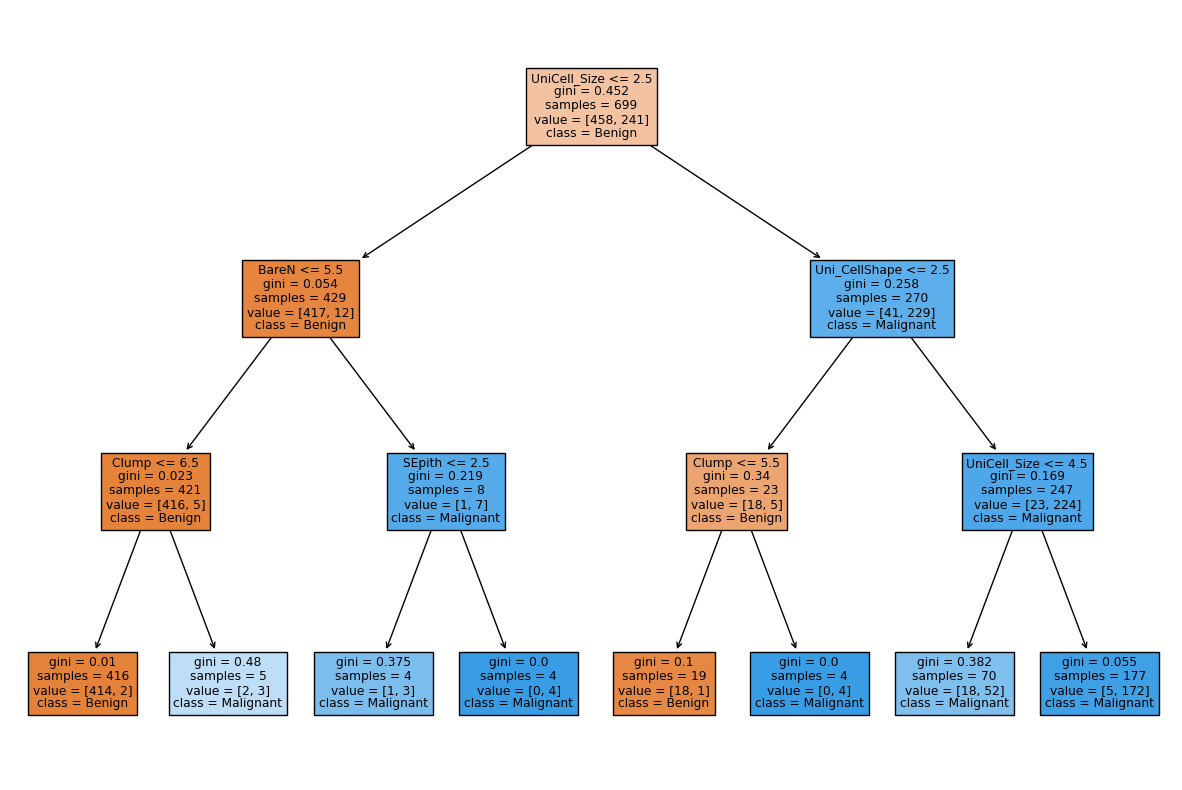

In [42]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=cancer_df.columns,class_names=['Benign','Malignant'],filled=True);

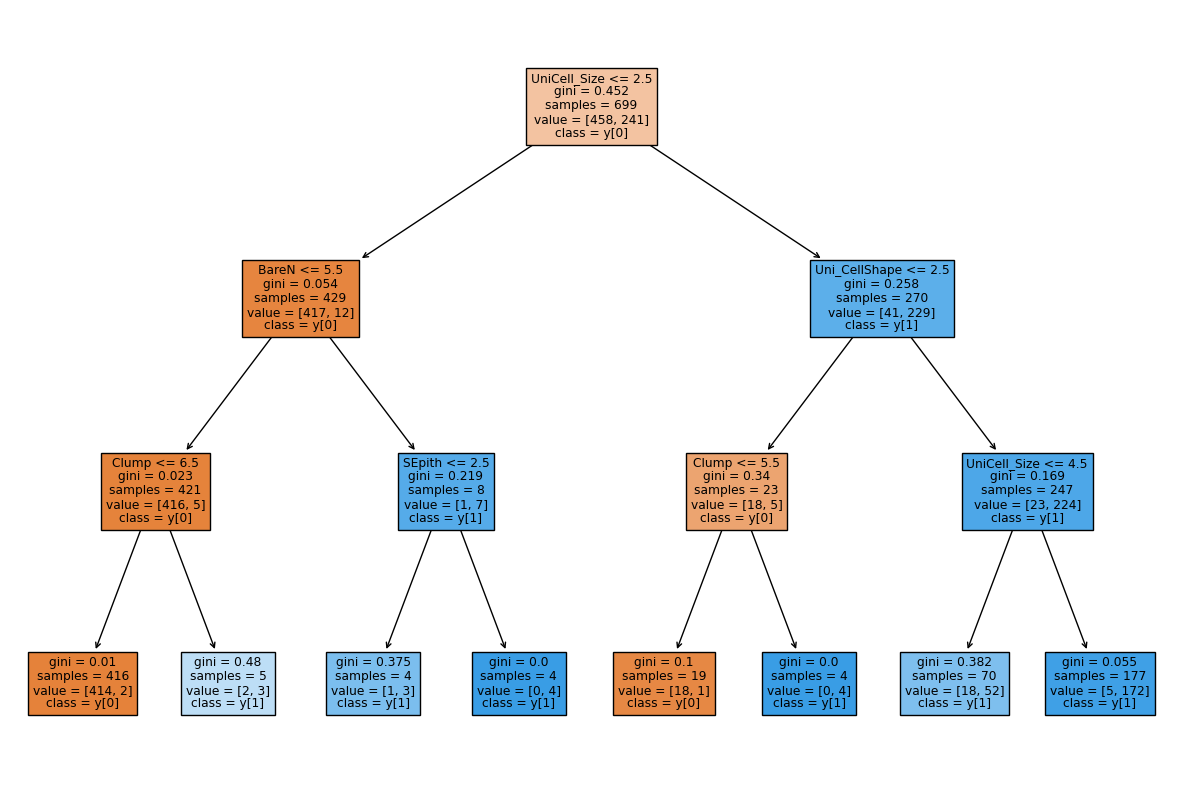

In [43]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=cancer_df.columns,class_names=True,filled=True);